# The Impact of Covid on the US Economy and Food Insecurity
The objective of this project is to analyze and demonstrate the impact of COVID on the economy and food insecurity issue in the US. 

### Project Background

COVID took us by surprise in 2020.  While people were still trying to figure out what it was and how it was going to impact our life, it quickly turned into a global pandemic.  On March 13, President Donald Trump declared the novel coronavirus a national emergency. On the same day, schools in Illinois were closed to in-person instruction. On March 20, JB Pritzker, Governor of the State of Illinois issued the ‘stay at home’ order for Illinois residents. It felt like the whole world was put on pause. It was not until December of 2020 when Pfizer and Moderna vaccines received the Emergency Use Authorization (EUA) from the U.S Food and Drug Administration (FDA) that people started to see some light at the end of the tunnel. Before COVID, there were already many people in the U.S. who lived in food-insecure households. After COVID hit the US like a cyclone, there were even more people who lost their jobs overnight, putting more families at risk for affording enough food.  Long lines at food banks across the US were seen in the news everyday.  The actual impact to the US economy and poor families at the macro level can be revealed from analyzing The US GDP data and snap program data.

### Data Sources:

#### Quarterly US GDP Data - US GDP data published by FRED Economic Research (https://fred.stlouisfed.org/series/GDP)
#### Monthly Supplemental Nutrition Assistance Program (SNAP) Data - national level annual summary data published by the U.S. Department of Agriculture Food and Nutrition Service (https://fns-prod.azureedge.net/pd/supplemental-nutrition-assistance-program-snap)
#### US Census Data - US Census Data published by the United States Census Bureau (https://www.census.gov/data)


### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from matplotlib.ticker import FuncFormatter

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
# 1. read data from the Snap Program data file
## (1.1) read 5 columns from the [For Analysis] tab
df_snap = pd.read_excel (r'SNAPZip69throughCurrent Combined.xlsx'
                         ,sheet_name='For Analysis'
                         ,usecols="D,G,H,J,N,P"
                        )

## (1.2) filter data frame to include only the 12 records of 2020 US Summary
df_snap = df_snap[(df_snap['State'] == 'US Summary') & (df_snap['Calendar Year'] == 2020)] 

## (1.3) make sure [Calendar Year and Month] is in date type
df_snap['Calendar Year and Month'] = pd.to_datetime(df_snap['Calendar Year and Month'],format='%Y%m%d')

## (1.4) add a column with a constant value for cross join
df_snap['Col Snap'] = 1

##df_snap

# 2. read data from the GDP file
## (2.1) read all columns from the [FRED Graph] tab
df_gdp = pd.read_excel(r'GDP for Analysis.xls'
                         ,sheet_name='FRED Graph'
                         ,usecols="A:F")

## (2.2) make sure [observation_date] and [observation_date2] are in date type
df_gdp['observation_date'] = pd.to_datetime(df_gdp['observation_date'],format='%Y%m%d')
df_gdp['observation_date2'] = pd.to_datetime(df_gdp['observation_date2'],format='%Y%m%d')

## (2.3) filter data frame to include only the 2020 GDP data
df_gdp = df_gdp[(df_gdp['observation_date'].dt.year == 2020) & (df_gdp['observation_date2'].dt.year == 2020)] 

## (2.4) add a column with a constant value for cross join
df_gdp['Col GDP'] = 1
##df_gdp

# 3. add monthly GDP to df_snap
df_snap = pd.merge(df_snap, df_gdp, how='inner', left_on='Col Snap', right_on='Col GDP')
df_snap = df_snap[(df_snap['Calendar Year and Month']>=df_snap['observation_date'])&(df_snap['Calendar Year and Month']<=df_snap['observation_date2'])]
##df_snap

# 4. read data from the US Census file
## (4.1) read all columns from the [FRED Graph] tab
df_census = pd.read_excel(r'US Census Data.xlsx'
                         ,sheet_name='US Census'
                         ,usecols="A:E")

## (4.2) filter data frame to include only the 2020 Census data
df_census = df_census[(df_census['State (Cleansed)'] == 'US Summary') & (df_census['Year'] == 2020)] 

## (4.3) add a column with a constant value for cross join
df_census['Col Census'] = 1
##df_census

# 5. add us Census to df_snap
df_snap = pd.merge(df_snap, df_census, how='inner', left_on='Col Snap', right_on='Col Census')
##df_snap

#6. add analysis columns for aggregation and plotting
df_analysis = df_snap[["Calendar Year and Month","PEOPLE (cleansed)","BENEFITS (Cleansed)","BENEFITS per Person (Cleansed)","GDP_Monthly","Population"]]
df_analysis["Calendar Year and Quarter"] = df_analysis["Calendar Year and Month"].dt.to_period('Q')
df_analysis["Calendar Month"] = df_analysis["Calendar Year and Month"].dt.strftime('%m')
df_analysis["Calendar Month Name"] = df_analysis["Calendar Year and Month"].dt.month_name().str[:3]
df_analysis["Calendar Year and Month"] = df_analysis["Calendar Year and Month"].dt.strftime('%Y-%m-%d')
df_analysis["GDP_Monthly"] = df_analysis["GDP_Monthly"] * 1000000000
df_analysis = df_analysis.sort_values(["Calendar Year and Month"], ascending = (True))

#df_analysis

#7. Percent of Change from Prior Month
#(7.1) BENEFITS % of Change from Prior Month
df_analysis["BENEFITS (Cleansed) Pct Change"] = (df_analysis["BENEFITS (Cleansed)"] - df_analysis["BENEFITS (Cleansed)"].shift(1))/df_analysis["BENEFITS (Cleansed)"].shift(1)
#df_analysis

#(7.2) % of Benefits over GDP
df_analysis["BENEFITS (Cleansed) Over GDP"] = df_analysis["BENEFITS (Cleansed)"]/(df_analysis["GDP_Monthly"])
#df_analysis

#(7.3) GDP % of Change
df_analysis["GDP_Monthly Pct Change"] = (df_analysis["GDP_Monthly"]-df_analysis["GDP_Monthly"].shift(1))/df_analysis["GDP_Monthly"].shift(1)
#df_analysis

#(7.4) People % of Change from Prior Month
df_analysis["PEOPLE (cleansed) Pct Change"] = (df_analysis["PEOPLE (cleansed)"] - df_analysis["PEOPLE (cleansed)"].shift(1))/df_analysis["PEOPLE (cleansed)"].shift(1)
#df_analysis

#(7.5) % of People over Population
df_analysis["PEOPLE (cleansed) Over Population"] = df_analysis["PEOPLE (cleansed)"]/df_analysis["Population"]

df_analysis = df_analysis.where(pd.notnull(df_analysis), None)

pd.options.display.float_format = '{:.4f}'.format
df_analysis

,Calendar Year and Month,PEOPLE (cleansed),BENEFITS (Cleansed),BENEFITS per Person (Cleansed),GDP_Monthly,Population,Calendar Year and Quarter,Calendar Month,Calendar Month Name,BENEFITS (Cleansed) Pct Change,BENEFITS (Cleansed) Over GDP,GDP_Monthly Pct Change,PEOPLE (cleansed) Pct Change,PEOPLE (cleansed) Over Population
0,2020-01-01,37100836,4458185962,120.1640,7160455666666.6660,331449281,2020Q1,01,Jan,None,0.0006,None,None,0.1119
1,2020-02-01,36867839,4465780275,121.1294,7160455666666.6660,331449281,2020Q1,02,Feb,0.0017,0.0006,0.0000,-0.0063,0.1112
2,2020-03-01,37208099,5273110099,141.7194,7160455666666.6660,331449281,2020Q1,03,Mar,0.1808,0.0007,0.0000,0.0092,0.1123
3,2020-04-01,41010834,7644054847,186.3911,6492481333333.3330,331449281,2020Q2,04,Apr,0.4496,0.0012,-0.0933,0.1022,0.1237
4,2020-05-01,42740898,7650039572,178.9864,6492481333333.3330,331449281,2020Q2,05,May,0.0008,0.0012,0.0000,0.0422,0.1290
5,2020-06-01,43004655,7665666926,178.2520,6492481333333.3330,331449281,2020Q2,06,Jun,0.0020,0.0012,0.0000,0.0062,0.1297
6,2020-07-01,42850999,7673492473,179.0738,7046191333333.3330,331449281,2020Q3,07,Jul,0.0010,0.0011,0.0853,-0.0036,0.1293
7,2020-08-01,42463589,7721885802,181.8472,7046191333333.3330,331449281,2020Q3,08,Aug,0.0063,0.0011,0.0000,-0.0090,0.1281
8,2020-09-01,42935107,7890483434,183.7770,7046191333333.3330,331449281,2020Q3,09,Sep,0.0218,0.0011,0.0000,0.0111,0.1295
9,2020-10-01,41946787,7862431569,187.4382,7159199000000.0010,331449281,2020Q4,10,Oct,-0.0036,0.0011,0.0160,-0.0230,0.1266


### Data Analysis

#### 1. Quarterly GDP (in Billions) and Percentage Change From the Prior Quarter in 2020
This analysis shows that the US GDP dropped by 9.3% from Q1 to Q2, then increased by 8.5% from Q2 to Q3.  Q4 GDP reached a level close to Q1 GDP

(0.0, 30000000000000.0)

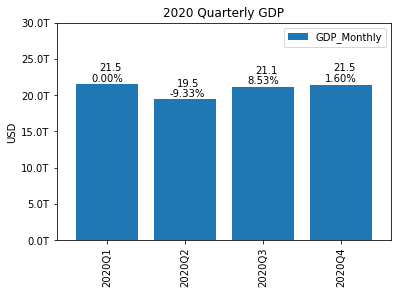

In [3]:
# (1) Calculate Quarterly GDP
df_plot = df_analysis.groupby('Calendar Year and Quarter').agg({'GDP_Monthly':['sum'],'GDP_Monthly Pct Change':['sum']})
df_plot.reset_index(inplace=True)
df_plot.columns = df_plot.columns.droplevel(1)
array_plot = df_plot.to_numpy()
#df_plot
#array_plot

# (2) Plot a bar chart with annotation
num_factorial = 1e12
ax = df_plot.plot.bar(x="Calendar Year and Quarter", y="GDP_Monthly", width = 0.8)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:2.1f}T'.format(y/num_factorial)))
ax.set_ylabel("USD")
ax.set_xlabel('')
ax.set_title("2020 Quarterly GDP")
cnt = 0
for p in ax.patches:
    b = p.get_bbox()
    val = '{:2.1f}'.format(b.y1/num_factorial)
    val_pct = '{:.2%}'.format(array_plot[cnt,2])
   # print(val_pop)
   # print(b)
    ax.annotate(val_pct, (b.x0+0.2, b.y1*1.02))
    ax.annotate(val, (b.x0+0.3, b.y1*1.09))
    #ax.annotate
    cnt += 1
plt.rcParams["figure.figsize"] = [8, 4]
plt.ylim(0,3e13)

##### This analysis shows that the US GDP dropped by 9.3% from Q1 to Q2, then increased by 8.5% from Q2 to Q3.  Q4 GDP reached a level close to Q1 GDP

#### 2. Number of People Enrolled in the SNAP Program and Percentage Change From the Prior Month
This analysis shows that the number of people enrolled in the SNAP program increased by 10.22% in April and kept increasing in both May and June. The headcount started decreasing in June but at a very slow pace.

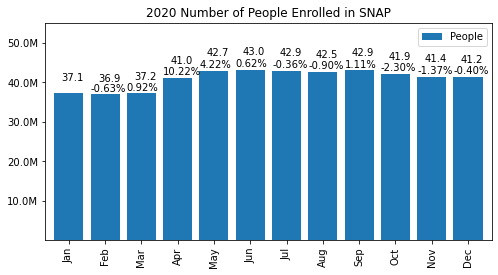

In [6]:
df_plot = df_analysis[["Calendar Month Name","PEOPLE (cleansed)","PEOPLE (cleansed) Pct Change"]]
df_plot.columns.values[1] = "People"
array_plot = df_plot.to_numpy()

num_factorial = 1e6
ax = df_plot.plot.bar(x="Calendar Month Name", y="People", width=0.8)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:2.1f}M'.format(y/num_factorial)))
ax.set_xlabel("")
ax.set_title("2020 Number of People Enrolled in SNAP")
cnt = 0
x_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = '{:2.1f}'.format(b.y1/num_factorial)    
    if array_plot[cnt,2] is not None:
        val_pct = '{:.2%}'.format(array_plot[cnt,2])
        ax.annotate(val_pct, (b.x0, b.y1*1.02))
        #print(val_pct)
   # print(b)
    ax.annotate(val, (b.x0+0.2, b.y1*1.09))
    cnt += 1
plt.ylim(13,5.5e7)
plt.rcParams["figure.figsize"] = [8.5, 4]


##### This analysis shows that the number of people enrolled in the SNAP program increased by 10.22% in April and kept increasing in both May and June. The headcount started decreasing in June but at a very slow pace.

#### 3. Percentage of Benefit of Snap Program Over US GDP
This analysis shows that, in Q1 before COVID, only 0.06% - 0.07% of the US GDP was used for the SNAP program.  That percent doubled to 0.12% in Q2. In Q3, the percentage dropped by only 0.01% to 0.11% and stayed flat until the end of 2020.

(0.0005, 0.0014)

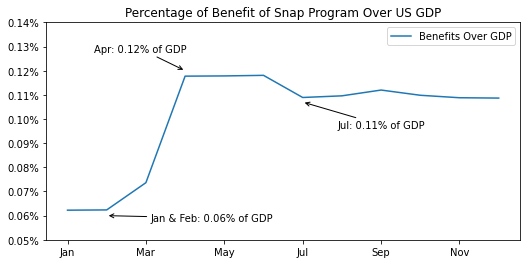

In [7]:
df_plot = df_analysis[["Calendar Month Name","BENEFITS (Cleansed) Over GDP"]]
df_plot.columns.values[1] = "Benefits Over GDP"
df_plot

ax = df_plot.plot.line(x="Calendar Month Name", y="Benefits Over GDP")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:2.2%}'.format(y)))
ax.set_xlabel('')
ax.set_title("Percentage of Benefit of Snap Program Over US GDP")
ax.annotate('Jan & Feb: 0.06% of GDP', xy=(1, 0.0006),  xycoords='data',
            xytext=(0.35, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='center', verticalalignment='center'
            )
ax.annotate('Apr: 0.12% of GDP', xy=(3, 0.0012),  xycoords='data',
            xytext=(0.2, 0.90), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='center', verticalalignment='top',
            )
ax.annotate('Jul: 0.11% of GDP', xy=(6, 0.00107),  xycoords='data',
            xytext=(0.8, 0.55), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right', verticalalignment='top',
            )
    
plt.rcParams["figure.figsize"] = [8.5, 4]
plt.ylim (0.0005,0.0014)



##### This analysis shows that, in Q1 before COVID, only 0.06% - 0.07% of the US GDP was used for the SNAP program. That percent doubled to 0.12% in Q2. In Q3, the percentage dropped by only 0.01% to 0.11% and stayed flat until the end of 2020.

#### 4. Summary Statistics

##### a. Total by Month

In [8]:
df_analysis["Category"] = "TBD"

df_monthly_snap = pd.pivot_table(df_analysis
                                 , index="Category"
                                 , columns="Calendar Year and Month"
                                 , values="BENEFITS (Cleansed)"
                                 , aggfunc="sum")
df_monthly_snap.rename(index={'TBD':'(a) Benefit'},inplace=True)
#df_monthly_snap

df_monthly_GDP = df_analysis.pivot_table(index="Category"
                                         , columns='Calendar Year and Month'
                                         , values='GDP_Monthly'
                                         , aggfunc='first')
df_monthly_GDP.rename(index={'TBD':'(b) GPD'},inplace=True)
#df_monthly_GDP

df_monthly_people = df_analysis.pivot_table(index="Category", columns='Calendar Year and Month', values='PEOPLE (cleansed)', aggfunc='first')
df_monthly_people.rename(index={'TBD':'(c) People of Snap Program'},inplace=True)
#df_monthly_people

df_monthly_population = df_analysis.pivot_table(index="Category", columns='Calendar Year and Month', values='Population', aggfunc='first')
df_monthly_population.rename(index={'TBD':'(d) 2020 Population'},inplace=True)
#df_monthly_population

df_total = pd.concat([df_monthly_snap,df_monthly_GDP,df_monthly_people,df_monthly_population])
df_total.reset_index(inplace=True)

df_total

Calendar Year and Month,Category,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
0,(a) Benefit,4458185962.0000,4465780275.0000,5273110099.0000,7644054847.0000,7650039572.0000,7665666926.0000,7673492473.0000,7721885802.0000,7890483434.0000,7862431569.0000,7789263545.0000,7779130143.0000
1,(b) GPD,7160455666666.6660,7160455666666.6660,7160455666666.6660,6492481333333.3330,6492481333333.3330,6492481333333.3330,7046191333333.3330,7046191333333.3330,7046191333333.3330,7159199000000.0010,7159199000000.0010,7159199000000.0010
2,(c) People of Snap Program,37100836.0000,36867839.0000,37208099.0000,41010834.0000,42740898.0000,43004655.0000,42850999.0000,42463589.0000,42935107.0000,41946787.0000,41372794.0000,41205604.0000
3,(d) 2020 Population,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000,331449281.0000


##### b. Percent of SNAP Benefit over GDP

In [9]:
df_monthly_snap_over_gdp = pd.pivot_table(df_analysis
                                 , index="Category"
                                 , columns="Calendar Year and Month"
                                 , values="BENEFITS (Cleansed) Over GDP"
                                 , aggfunc="sum")
df_monthly_snap_over_gdp.rename(index={'TBD':'(e) % of Benefit over GDP'},inplace=True)
df_monthly_snap_over_gdp.reset_index(inplace=True)
pd.options.display.float_format = '{:.2%}'.format
df_monthly_snap_over_gdp


Calendar Year and Month,Category,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
0,(e) % of Benefit over GDP,0.06%,0.06%,0.07%,0.12%,0.12%,0.12%,0.11%,0.11%,0.11%,0.11%,0.11%,0.11%


##### c. Percent of People Enrolled in SNAP over US Population

In [10]:
df_monthly_people_over_population = pd.pivot_table(df_analysis
                                 , index="Category"
                                 , columns="Calendar Year and Month"
                                 , values="PEOPLE (cleansed) Over Population"
                                 , aggfunc="sum")
df_monthly_people_over_population.rename(index={'TBD':'(f) % of Snap People Count over US Population'},inplace=True)
df_monthly_people_over_population.reset_index(inplace=True)
df_monthly_people_over_population

Calendar Year and Month,Category,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
0,(f) % of Snap People Count over US Population,11.19%,11.12%,11.23%,12.37%,12.90%,12.97%,12.93%,12.81%,12.95%,12.66%,12.48%,12.43%


##### d. Percent of Change from the Prior Month

In [12]:
df_monthly_snap_pct_change = pd.pivot_table(df_analysis
                                 , index="Category"
                                 , columns="Calendar Year and Month"
                                 , values="BENEFITS (Cleansed) Pct Change"
                                 , aggfunc="sum")
df_monthly_snap_pct_change.rename(index={'TBD':'(g) Benefit % of Change'},inplace=True)
#df_monthly_snap_pct_change


df_monthly_people_pct_change = pd.pivot_table(df_analysis
                                 , index="Category"
                                 , columns="Calendar Year and Month"
                                 , values="PEOPLE (cleansed) Pct Change"
                                 , aggfunc="sum")
df_monthly_people_pct_change.rename(index={'TBD':'(h) People % of Change'},inplace=True)
#df_monthly_people_pct_change


df_total = pd.concat([df_monthly_snap_pct_change,df_monthly_people_pct_change])
df_total.reset_index(inplace=True)

pd.options.display.float_format = '{:.2%}'.format
df_total



Calendar Year and Month,Category,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
0,(g) Benefit % of Change,0.00%,0.17%,18.08%,44.96%,0.08%,0.20%,0.10%,0.63%,2.18%,-0.36%,-0.93%,-0.13%
1,(h) People % of Change,0.00%,-0.63%,0.92%,10.22%,4.22%,0.62%,-0.36%,-0.90%,1.11%,-2.30%,-1.37%,-0.40%
